<a href="https://colab.research.google.com/github/Machinescape/ML_Class/blob/master/1_Supervised_ML_Linear_Regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
 %matplotlib inline
import matplotlib
import seaborn as sns
#matplotlib.rcParams['savefig.dpi'] = 144
from IPython.display import Image

In [0]:
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "drive/My Drive/Econ 622 - Spring 2020/Data"

housing.data.txt


## Supervised Learning

For this and all other machine-learning setups, 

$$X = \{X_{ji}\}$$

is an $n \times p$ matrix of features ($1 \le j \le n$ and $1 \le i \le p$) and 

$$y_j$$

is an $n$-vector of labels.  In all **supervised** learning problems, we are trying to build a **model** $f$ (predictive relationship) that maps the feature rows $\{X_{j \cdot}\}$ to each label $y_j$ so that 

$$f(X_{j \cdot}) \approx y_j.$$

With this predictive model, we will be able to predict the label associated with a new feature row $\tilde X_{j \cdot}$ via $f(\tilde X_{j \cdot})$.  That's it.

All supervised learning can be represented in this form.  The parameters that can change are:

1. The **model** $f$.  This module will only cover linear models.  We will often assume that one of the columns of $X$ is the constant $1$.  Therefore,

 $$ f(X_{j \cdot}) = X_{ji} \cdot \beta_i$$

 represents the entire linear model concisely, including the constant intercept term.

1. The **error distribution** of how $y_j$ are distributed.  If the model $f$ is linear, varying the error distribution gives us different classes of the General Linear Models (GLM)s.  We'll talk about the Logistic Regression (arguably the most important GLM after linear regression) but there are many others.  To learn more about GLMs, there are a good set of notes available [here](http://data.princeton.edu/wws509/notes/a2.pdf).

With both a model and the error distribution, we can easily compute the likelihood function.  The problem in GLM is to choose the model that maximizes the likelihood function.

A few key concepts:
1. Within Supervised machine learning, there are roughly two broad classes of problems, **Regression** and **Classification**.  Regression is when the values of $y$ are continuous and real-valued.  Classification is when $y$ takes on a discrete discrete number of possible values.
1. What does it mean for the prediction to be accurate?  That depends on what **metric** we use, which is at the discretion of the modeler.  Obviously, some metrics make sense for regression, and others for classification.

**Question:**
1. What are some examples of classification versus regression problems or algorithms?
1. These are all examples of supervised learning problems or algorithms.  Do you know of an example of an unsupervised learning problem or algorithm?

## Linear Regression

Remember the basic picture of linear regression errors:

![$L^1$ versus $L^2$ regularization](https://drive.google.com/uc?id=1uUDZz8wDPLEabjW-y37-3B0yMVR276Qh)
Linear Regression is perhaps the simplest linear model $f(X_{j \cdot}) = \sum_i \beta_i X_{ji}$.  The error model assumes the $y_j$'s are independent and normally distributed around $X_{ji} \cdot \beta_i$ with standard deviation $\sigma$.  

### Likelihood and cost functions
Suppose that we knew that the correct model was given by some $\beta_i$.  Given the above assumption about the error model, the probability of measuring $y_j$ is simply

$$ P(y_j \mid \beta_i) = \prod_j \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left[-\left( \frac{X_{ji} \cdot \beta_i - y_j}{2 \sigma} \right)^2 \right] \,.$$

However, we don't know the $\beta_i$.  Instead we want to find them, given the $y_j$, by finding the $\beta_i$ that maximize $P(\beta_i \mid y_j)$.  Thanks to Bayes' Rule, we know

$$ P(\beta_i \mid y_j) = P(y_j \mid \beta_i) \frac{P(\beta_i)}{P(y_j)} \,.$$

We know the first term on the right-hand side, and $P(y_j)$ is independent of $\beta_i$, leaving only $P(\beta_i)$ unknown.  In linear regression, we suppose we have no *a priori* knowledge of the expected coefficients and take $P(\beta_i)$ to be constant as well.  Thus, the most probable model is determined by maximizing the likelihood function:

$$ L(\beta) = \prod_j \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left[-\left( \frac{X_{ji} \cdot \beta_i - y_j}{2 \sigma} \right)^2 \right] \propto P(\beta_i \mid y_j) \,.$$

Since $\log$ is monotonic, we can also maximize the log-likelihood.  A few calculations show us that the negative log-likelihood (up to a linear transformation) is

$$- \log(L(\beta)) \sim \| y - X \beta \|^2\,.$$

Here, $\| z \| = \| z \|_2 = \sum_i |z_i|^2 $ is the $L^2$ norm.  The objective is to minimize this quadratic:

$$ \min_\beta \| y - X \beta \|^2\,.$$

Of course, this is the familiar expression for linear regression.  We could minimize $\beta$ via gradient descent, but it turns out that the solution has a closed form, 

$$ X \hat \beta = y\,, $$

or

$$ \hat \beta = (X^T X)^{-1} X^T y\,. $$

### **Exercises**:
1. What about the intercept term?
1. Prove that the solution $\hat \beta$ actually minimizes the negative log-likelihood.  (Hint: $X (X^T X)^{-1}X^T$ is the projection operator onto the subsapce spanned by the columns of $X$).
1. What happens if $X^T X$ is singular, e.g. $X$ has two columns that are co-linear.  What does this mean in terms of identification?  When might this occur in the data in real life?
1. What happens when $p \gg n$?  How do you deal with this?
1. What happens if $X$ has two rows that are co-linear?  Why might this happen in real life?
1. What is the effect of outliers?  How do you deal with them?
1. What if $y$ values are always positive?  What if $y$ values are in a fixed range $[a,b]$?

# Housing dataset
## Loading the Housing dataset into a data frame

Description, which was previously available at: [https://archive.ics.uci.edu/ml/machine-learning-databases/housing/](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)

Attributes:
    
<pre>
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000s
</pre>

In [0]:
import pandas as pd

df = pd.read_csv('drive/My Drive/Econ 622 - Spring 2020/Data/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Visualizing the important characteristics of a dataset

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

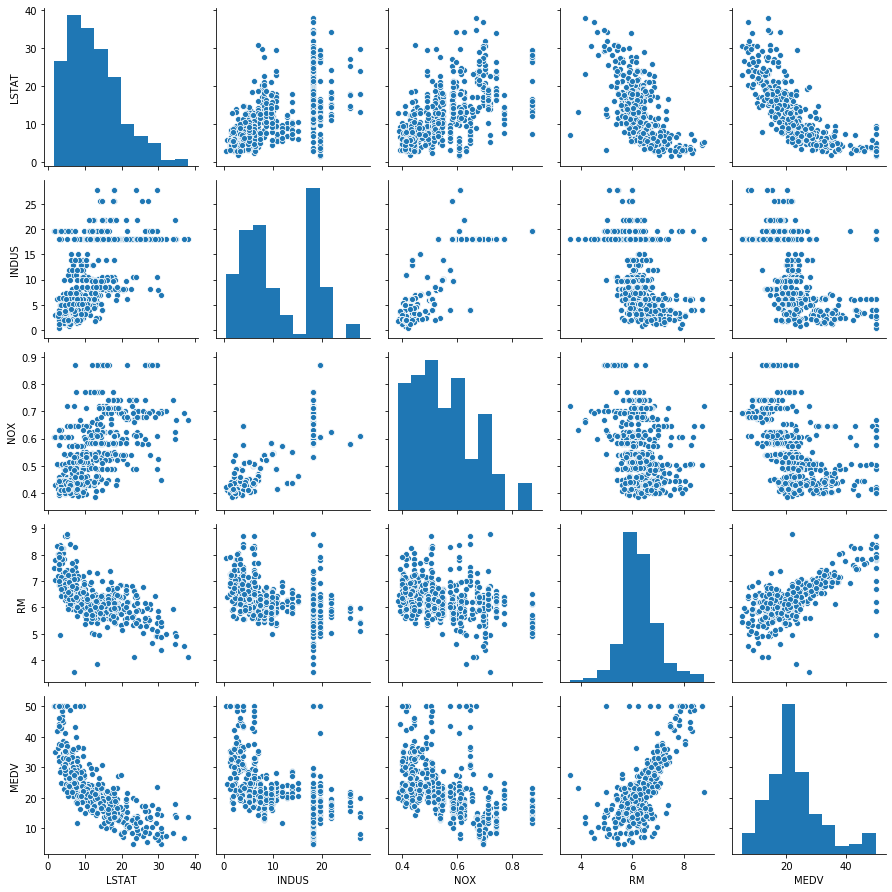

In [0]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
plt.show()

Some of these features look to be linear, but others aren't.  Sometimes, the inverse of features with negative correlation produces a better fit.  Relationships that look like step functions are better modeled with indicator features.

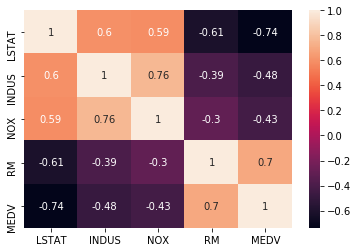

In [0]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
#sns.set(font_scale=1)
hm = sns.heatmap(cm,
                 #cbar=True,
                 annot=True,
                 #square=True,
                 #fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols,
                 xticklabels=cols)

#plt.tight_layout()
plt.show()

## Estimating the coefficient of a regression model via scikit-learn

(Raschka, 2017)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
X = df[['RM']].values
y = df['MEDV'].values

In [0]:
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


In [0]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

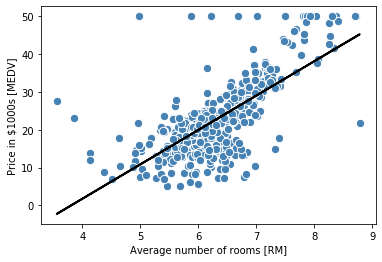

In [0]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')

plt.show()

In [0]:
# adding a column vector of "ones"
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))

print('Slope: %.3f' % w[1])
print('Intercept: %.3f' % w[0])

Slope: 9.102
Intercept: -34.671


## Multiple Linear Regression

In [0]:
Xraw = df.iloc[:, :-1].values
y = df['MEDV'].values

In [0]:
X = df.copy()
X["INV_CRIM"] = 1./X.CRIM
X["INDUS7"] = X.INDUS <= 7.
X["INDUS16"] = 1. * (X.INDUS <= 16.)
X["INV_NOX"] = 1./X.NOX
X["AGE75"] = 1. * (X.AGE <= 76.)
X["RAD15"] = 1. * (X.RAD <= 15.)
X["TAX500"] = 1. * (X.TAX <= 500.)
X["PTRATIO19"] = X.PTRATIO <= 19.
X["B350"] = 1. * (X.B <= 350.)
X["INV_LSTAT"] = 1. / X.LSTAT
X=X.astype(float)  # coerce booleans to a float
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,INV_CRIM,INDUS7,INDUS16,INV_NOX,AGE75,RAD15,TAX500,PTRATIO19,B350,INV_LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,158.227848,1.0,1.0,1.858736,1.0,1.0,1.0,1.0,0.0,0.200803
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,36.616624,0.0,1.0,2.132196,0.0,1.0,1.0,1.0,0.0,0.109409
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,36.643459,0.0,1.0,2.132196,1.0,1.0,1.0,1.0,0.0,0.248139
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,30.892802,1.0,1.0,2.183406,1.0,1.0,1.0,1.0,0.0,0.340136
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,14.482259,1.0,1.0,2.183406,1.0,1.0,1.0,1.0,0.0,0.187617


In [0]:
original_columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
new_columns = ['INV_CRIM', 'ZN', 'INDUS7', 'INDUS16', 'CHAS', 'INV_NOX', 
               'RM', 'AGE75', 'DIS', 'RAD15', 'TAX500', 'PTRATIO19', 'B350', 'INV_LSTAT']
all_columns = new_columns + original_columns

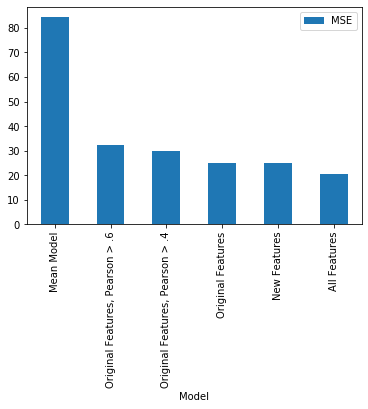

In [0]:
from sklearn import model_selection, linear_model
from scipy import stats

cv = model_selection.ShuffleSplit(n_splits=20, test_size=0.2, random_state=42)

linreg = linear_model.LinearRegression(fit_intercept=True)  # This is the default

def compute_error(est, X, y):
    return -model_selection.cross_val_score(est, X, y, cv=cv, scoring='neg_mean_squared_error').mean()

def abs_corr(x, y):
    return np.abs(stats.pearsonr(x, y)[0])


model_performance = pd.DataFrame([
    ("Mean Model", y.var()),
    ("Original Features, Pearson > .6",
       compute_error(linreg, X[[col for col in original_columns if abs_corr(X[col], y) > .6]], y)),
    ("Original Features, Pearson > .4",
       compute_error(linreg, X[[col for col in original_columns if abs_corr(X[col], y) > .4]], y)),
    ("Original Features", compute_error(linreg, X[original_columns], y)),
    ("New Features", compute_error(linreg, X[new_columns], y)),
    ("All Features", compute_error(linreg, X[all_columns], y)),
], columns=["Model", "MSE"])
model_performance.set_index("Model")
model_performance.plot(x="Model", y="MSE", kind="bar")

## Solving regression for regression parameters with gradient descent

(Raschka, 2017)

In [0]:
class LinearRegressionGD(object):

    """
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
      
    
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [0]:
X = df[['RM']].values
y = df['MEDV'].values

In [0]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [0]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

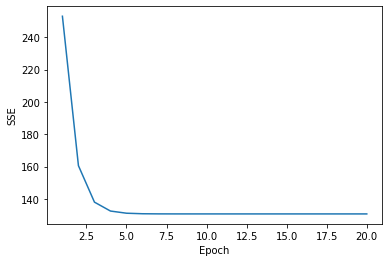

In [0]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
#plt.tight_layout()
plt.show()

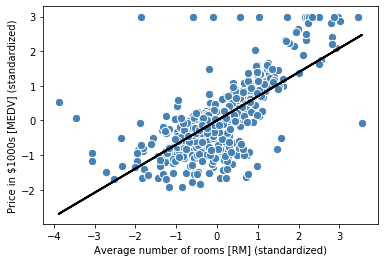

In [0]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')

plt.show()

In [0]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 0.695
Intercept: -0.000


In [0]:
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
print("Price in $1000s: %.3f" % sc_y.inverse_transform(price_std))

Price in $1000s: 10.840


## Understanding the scikit-learn estimator API

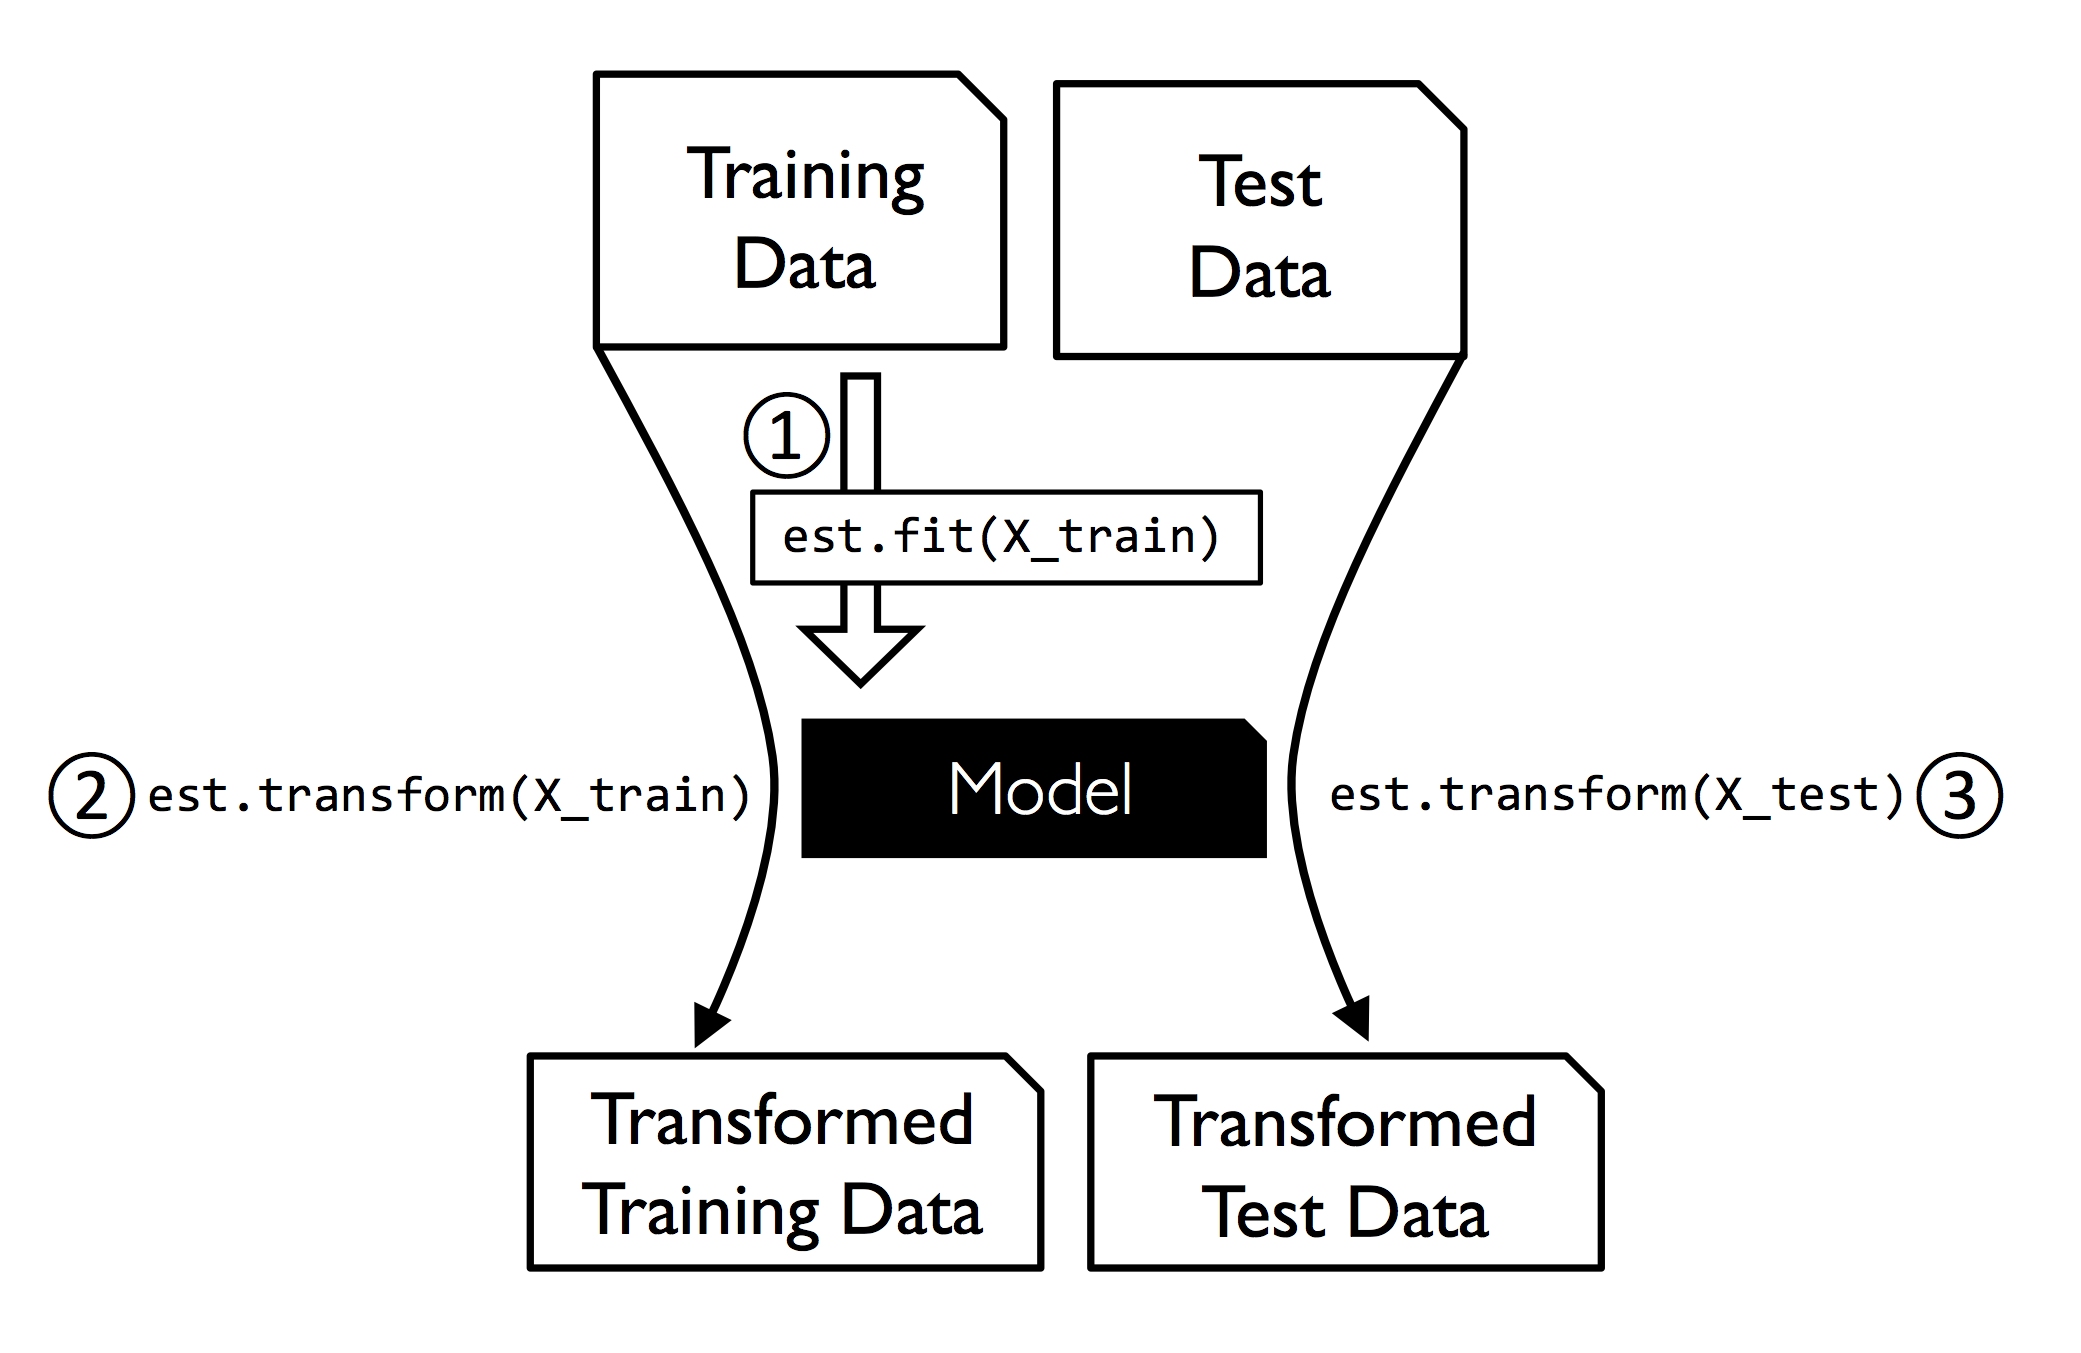

In [0]:
Image(filename='drive/My Drive/Econ 622 - Spring 2020/Images/scikit-learn_01.png', width=400) # (Raschka, 2017)

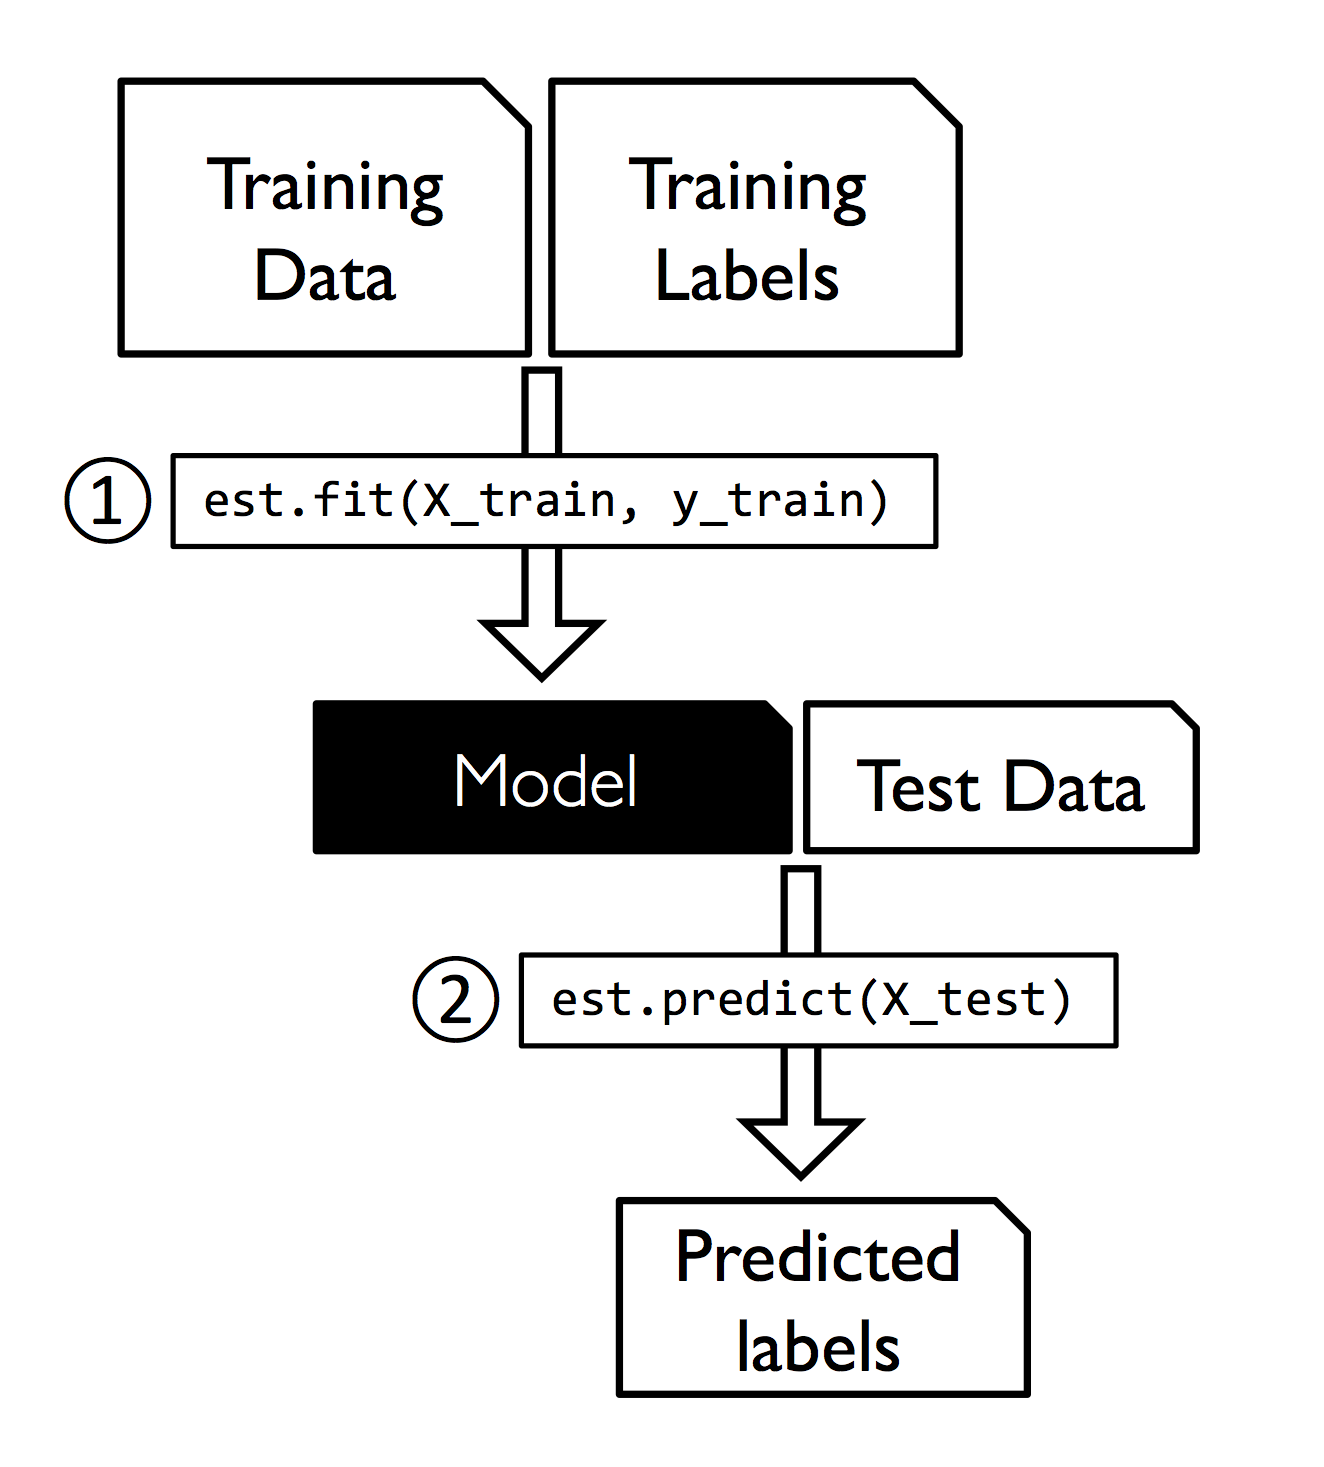

In [0]:
Image(filename='drive/My Drive/Econ 622 - Spring 2020/Images/scikit-learn_02.png', width=400) # (Raschka, 2017)

## Metrics for regression

**Sum of Squared Error** is the usual metric:

$$ \sum_j \left[f(X_{j \cdot}) - y_j\right]^2. $$

Unfortunately, this is susceptible to outliers. When this is an issue, **Absolute Error** can be better:

$$ \sum_j \left|f(X_{j \cdot}) - y_j\right|. $$

You've probably heard of **$R^2$** or the **Coefficient of Determination**. Although it's usually defined in a linear regression context, it's actually a very general idea: it measure the fraction of the error explained by the model $f$ versus the fraction of the error explained by a naive model that assumes the mean value of $y$ (i.e. the variance of $y$):

$$ 1 - \dfrac{\sum_j \left[f(X_{j \cdot}) - y_j\right]^2}{\sum_j \left(\overline y - y_j\right)^2} \qquad \mbox{where} \qquad \overline y = \frac{1}{n}\sum_j y_j \,.$$

**Questions:**

1. For a list of scalar values $z_1,\ldots,z_n$, the **mean** $\overline z$ is the quantity that minimizes the squared error:
 $$ \frac{d}{dz} \sum_j \left|z - z_j\right|^2 = 0$$
 $$ \frac{d}{dz} \left(Nz^2 - 2z(z_1 + z_2 + ...) + z_1^2 + z_2^2 + ...\right) = 0$$
 $$ 2Nz - 2(z_1 + z_2 + z_3 + ...) = 0$$

 $$ z = \frac{z_1 + z_2 + z_3 + ...}{N} = \overline z$$

 Do you know what quantity comes from minimizing the absolute error?
 $$ \mbox{argmin}_z \sum_j \left|z - z_j\right| $$
 Does this help explain why Absolute Error is less susceptible to outliers?
1. How does each of these metrics scale as you scale the labels ($y$'s) in our data set?

In [0]:
# Here are those metrics in scikit learn

from sklearn import metrics
from numpy import random
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

random.seed(42)

y_obs  = 2*random.randn(10)
y_pred = y_obs + .1 * random.randn(10)

print("Mean Absolute Error:", metrics.mean_absolute_error(y_obs, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_obs, y_pred))
print("R^2:", metrics.r2_score(y_obs, y_pred))

Mean Absolute Error: 0.09019001554146758
Mean Squared Error: 0.011386043722185452
R^2: 0.9939496048351353
